In [14]:
import numpy as np
import math
from numpy import linalg as LA



a = np.matrix([[1,0,0,0,0,0], [0, 1/math.sqrt(2), 1/math.sqrt(2), 0,0,0],
               [0, 1/math.sqrt(2), -1/math.sqrt(2), 0,0,0],
             [0,0,0,1/math.sqrt(2), 1/math.sqrt(2),0 ],
             [0,0,0,1/math.sqrt(2), -1/math.sqrt(2),0 ],
             [0,0,0,0,0,1]])

b = np.matrix([
        [-1,0,0,0,0,0],
        [0,0.5,0,0,0,0],
        [0,0,0.5,0,0,0],
        [0,0,0,0.25,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0.25],
    ])

ones = np.ones(6).reshape(6,1)

result = np.dot(a,b)
A = np.dot(result, a)
print (A)

#Given the original matrix x and parameter p
p = 0.5
x = np.zeros(6).reshape(6,1)

# This is the loop

x_saved = []

for i in range(100):
    temp = np.dot(A, x)
    x = x + np.dot(p*A.transpose(), (ones - temp))
    
    
x_100 = x

#Given the original matrix x and parameter p
p = 0.5
x = np.zeros(6).reshape(6,1)

# This is the loop

for i in range(1000):
    temp = np.dot(A, x)
    x = x + np.dot(p*A.transpose(), (ones - temp))
    x_saved.append(x)
    
x_1000 = x

#print(x_saved)
print (LA.norm(x_1000))
print (x_1000)


[[-1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.5    0.     0.     0.     0.   ]
 [ 0.     0.     0.5    0.     0.     0.   ]
 [ 0.     0.     0.     0.125  0.125  0.   ]
 [ 0.     0.     0.     0.125  0.125  0.   ]
 [ 0.     0.     0.     0.     0.     0.25 ]]
7.54983443527
[[-1.]
 [ 2.]
 [ 2.]
 [ 4.]
 [ 4.]
 [ 4.]]


In [19]:
#Part d
# x_1000
print(A)
result1 = np.dot(A,x_1000) - ones
print (result1)
result1_norm = LA.norm(x_1000) ** 2
print(result1_norm)

# x~
v = np.matrix([0,0,0,1,-1,0]).reshape(6,1)
x_test = x_1000 + v
print("x_tilde =", LA.norm(x_test))
result2 = np.dot(A,x_test) - ones
print (x_test)
result2_norm = LA.norm(x_test) ** 2
print(result2_norm)

[[-1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.5    0.     0.     0.     0.   ]
 [ 0.     0.     0.5    0.     0.     0.   ]
 [ 0.     0.     0.     0.125  0.125  0.   ]
 [ 0.     0.     0.     0.125  0.125  0.   ]
 [ 0.     0.     0.     0.     0.     0.25 ]]
[[  0.00000000e+00]
 [ -4.44089210e-16]
 [ -4.44089210e-16]
 [ -1.63202785e-14]
 [ -1.63202785e-14]
 [ -1.62092562e-14]]
57.0
x_tilde = 7.68114574787
[[-1.]
 [ 2.]
 [ 2.]
 [ 5.]
 [ 3.]
 [ 4.]]
59.0


In [4]:
# Another Loop
#Given the original matrix x and parameter p

p = 0.75
x = np.zeros(6).reshape(6,1)
y_saved = []

for i in range(1000):
    temp = np.dot(A, x)
    x = x + np.dot(p*A.transpose(), (ones - temp))
    y_saved.append(x)
    
print (y_saved)
    

[matrix([[-0.75  ],
        [ 0.375 ],
        [ 0.375 ],
        [ 0.1875],
        [ 0.1875],
        [ 0.1875]]), matrix([[-0.9375    ],
        [ 0.6796875 ],
        [ 0.6796875 ],
        [ 0.36621094],
        [ 0.36621094],
        [ 0.36621094]]), matrix([[-0.984375  ],
        [ 0.92724609],
        [ 0.92724609],
        [ 0.5365448 ],
        [ 0.5365448 ],
        [ 0.5365448 ]]), matrix([[-0.99609375],
        [ 1.12838745],
        [ 1.12838745],
        [ 0.69889426],
        [ 0.69889426],
        [ 0.69889426]]), matrix([[-0.99902344],
        [ 1.2918148 ],
        [ 1.2918148 ],
        [ 0.85363359],
        [ 0.85363359],
        [ 0.85363359]]), matrix([[-0.99975586],
        [ 1.42459953],
        [ 1.42459953],
        [ 1.00111952],
        [ 1.00111952],
        [ 1.00111952]]), matrix([[-0.99993896],
        [ 1.53248712],
        [ 1.53248712],
        [ 1.14169204],
        [ 1.14169204],
        [ 1.14169204]]), matrix([[-0.99998474],
        [ 1.62014578

In [5]:
x_saved_results = []
for i in range(100):
    x = x_saved[i]
    temp = np.dot(A,x) - ones
    value = LA.norm(temp) ** 2
    x_saved_results.append(value)
    
y_saved_results = []
for i in range(100):
    y = y_saved[i]
    temp = np.dot(A,y) - ones
    value = LA.norm(temp) ** 2
    y_saved_results.append(value)


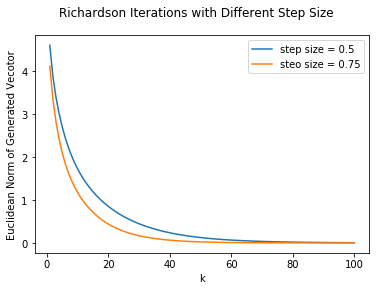

In [13]:
import matplotlib.pyplot as plt
x_axis = range(1,101)

fig = plt.figure()
line_up, = plt.plot(x_axis, x_saved_results, label='step size = 0.5')
line_down, = plt.plot(x_axis, y_saved_results, label='steo size = 0.75')
plt.ylabel('Euclidean Norm of Generated Vecotor')
plt.xlabel('k')
plt.legend(handles=[line_up, line_down])
fig.suptitle("Richardson Iterations with Different Step Size")
fig.savefig('test.jpg')
plt.show()

In [7]:
# A = np.matrix([[0,1,0,0,0,0], [0,0,1,0,0,0]])
# A = np.matrix([[0,0], [1,0], [0,1],[0,0],[0,0],[0,0]])
# A_transpose = A.transpose()
# print(A)
# B = np.dot(A, A_transpose)
# C = np.linalg.inv(B)
# print(B)
# print(C)
